### Import dependencies

In [1]:
%load_ext autotime

import cv2
from IPython.display import display_html, display
from PIL import Image as PILImage

from img2table.document import Image
from img2table.ocr import TesseractOCR, PaddleOCR

C:\Users\xavca\PycharmProjects\img2table\venv\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


time: 2.78 s (started: 2023-02-15 22:25:22 +01:00)


### Borderless table extraction

In order to extract borderless tables, an OCR should be provided to the <code>extract_tables</code> method as the algorithm relies on OCR results for table identification. If no OCR is provided, borderless table extraction will not be performed.

Using an example of a document provided in an <a href="https://aws.amazon.com/fr/blogs/machine-learning/merge-cells-and-column-headers-in-amazon-textract-tables/">AWS blogpost</a>, table extraction can be performed as follow :

##### Original image

<img src="data/borderless_aws.jpg" alt="Document with borderless tables from AWS blogpost" width="50%" height="50%">

In [2]:
img = Image("data/borderless_aws.jpg")
ocr = PaddleOCR()

extracted_tables = img.extract_tables(ocr=ocr,
                                      borderless_tables=True)

for idx, table in enumerate(extracted_tables):
    display_html(table.html_repr(title=f"Extracted table n°{idx + 1}"), raw=True)

,0,1
0,Beginning Balance:,$8000.00
1,Deposits,$3005.50
2,Other Subtractions,-1539.55


,0,1,2,3,4,5
0,Date,Description,Details,Credits,Debits,Balance
1,2/4/2022,Life Insurance Payments,Credit,,445,9500.45
2,,Property Management,Credit,,300,9945.45
3,,Retail Store4,Credit,,65.75,10245.45
4,2/3/2022,Electricity Bill,Credit,,245.45,10311.2
5,,Water Bill,Credit,,312.85,10556.65
6,,Rental Deposit,Credit,3000,,10869.5
7,2/2/2022,Retail Store 3,Credit,,125,7869.5
8,,Retail Store 2 Refund,Debit,5.5,,7994.5
9,,Retail Store1,Credit,,45.5,8000


time: 11.3 s (started: 2023-02-15 22:25:25 +01:00)


### Limitations related to OCR quality

Results and overall performance of the algorithm <b>heavily relies on OCR quality</b>.<br>
Hence, it is recommended to use PaddleOCR or one of the supported commercial solutions in order to achieve best results.

Using an illustrative image, those effects can be seen using Tesseract versus PaddleOCR :

In [3]:
img = Image("data/borderless_ocr.jpg")
tesseract = TesseractOCR()
paddle = PaddleOCR()

# Extract tables with Tesseract and PaddleOCR
tables_tesseract = img.extract_tables(ocr=tesseract, borderless_tables=True)
tables_paddle = img.extract_tables(ocr=paddle, borderless_tables=True)

time: 17.5 s (started: 2023-02-15 22:25:36 +01:00)


Table identification using Tesseract

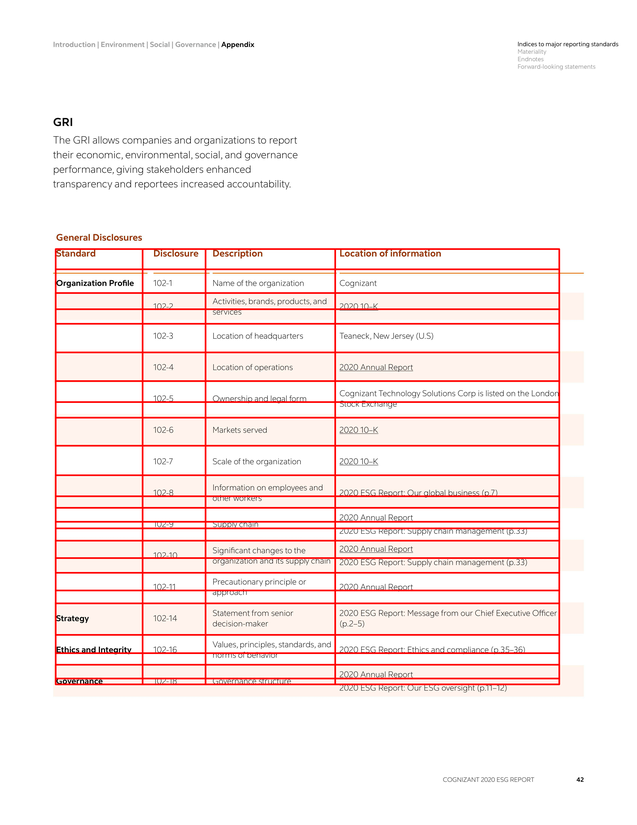

Table identification using PaddleOCR

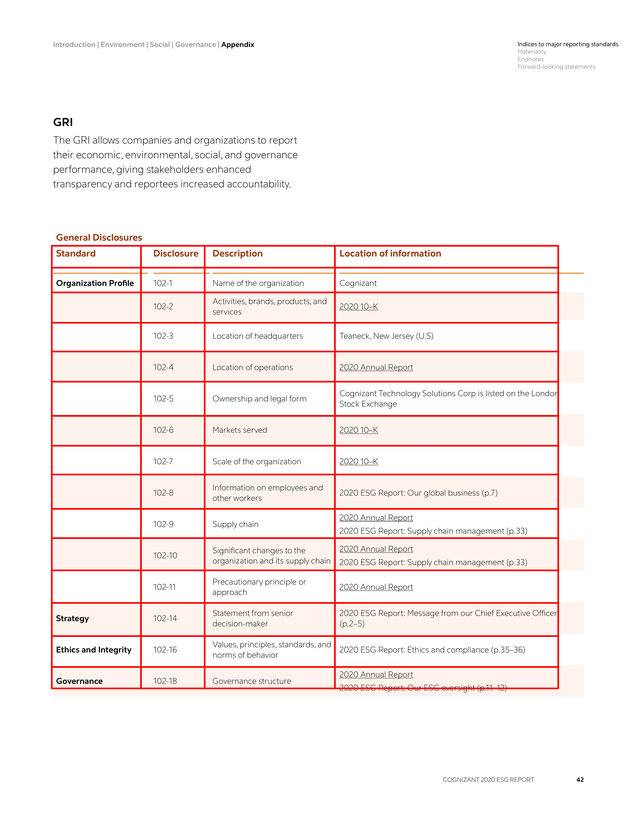

time: 750 ms (started: 2023-02-15 22:25:53 +01:00)


In [4]:
for ocr_name, tbs in [("Tesseract", tables_tesseract), ("PaddleOCR", tables_paddle)]:
    # Display extracted tables
    table_img = cv2.imread("data/borderless_ocr.jpg")

    for row in tbs.pop().content.values():
        for cell in row:
            cv2.rectangle(table_img, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2), (255, 0, 0), 10)
    
    pil_img = PILImage.fromarray(table_img)
    display_html(f"<h3>Table identification using {ocr_name}</h3>", raw=True)
    display(pil_img.resize([int(0.15 * s) for s in pil_img.size], PILImage.LANCZOS))